# Charge Time Analytics
## Kevin Quigley - x20217366


## Table Of Contents:
1. [Introduction](#into)
2. [Data Analysis](#anal)
 2.1 [Weather Dataset](#aveWeather)
 2.2 [Wind Energy Dataset](#windEnergy)
 2.3 [Energy Price Dataset](#Eprice)

## 1. Introduction<a name="into"></a>

The data is pulled from the server by executing "bash data/pullData.sh".
After data is pulled it is then read in as follows:-

In [1]:
import pandas as pd
import datetime as td
import  numpy as np
weatherMerged = pd.read_csv('data/weatherMerged.csv')


C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,39,41,111,123,131,133,135,136,137,138,139,141,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
weatherMerged= weatherMerged.sort_values(by="date2")
weatherMerged

,Date&Time,ActualGenerationMW,ForecastWind,ActualWind,ActualDemand,ForecastDemand,date2,minute,ker_ind,ker_rain,...,tip_ind.2,tip_wetb,tip_dewpt,tip_vappr,tip_rhum,tip_msl,tip_ind.3,tip_wdsp,tip_ind.4,tip_wddir
0,1 April 2019 00:00,2681.0,273,555,3430,-,2019-04-01 00:00:00,0,0,0.0,...,0,4.2,3.2,7.7,88,1024.0,2,3,2,130
1,1 April 2019 01:00,2696.0,241,470,3281,-,2019-04-01 01:00:00,0,0,0.0,...,0,2.1,1.1,6.6,89,1023.8,2,2,2,140
2,1 April 2019 02:00,2834.0,222,372,3149,-,2019-04-01 02:00:00,0,0,0.0,...,0,1.9,1.2,6.7,92,1023.2,2,3,2,160
3,1 April 2019 03:00,2886.0,225,342,3073,-,2019-04-01 03:00:00,0,0,0.0,...,0,1.5,0.8,6.5,92,1022.4,2,3,2,150
4,1 April 2019 04:00,2891.0,253,342,3024,-,2019-04-01 04:00:00,0,0,0.0,...,0,3.3,2.9,7.5,95,1021.6,2,3,2,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,31 March 2022 19:00,5542.0,1949,1891,5291,-,2022-03-31 19:00:00,0,0,0.0,...,0,2.4,-1.8,5.4,62,1022.2,2,7,2,350
26279,31 March 2022 20:00,5506.0,1781,1434,5254,-,2022-03-31 20:00:00,0,0,0.0,...,0,2.0,-1.8,5.4,65,1022.8,2,8,2,340
26280,31 March 2022 21:00,5514.0,1716,1379,5369,-,2022-03-31 21:00:00,0,0,0.0,...,0,1.3,-1.6,5.4,72,1023.3,2,8,2,330
26281,31 March 2022 22:00,5042.0,1635,1422,4907,-,2022-03-31 22:00:00,0,0,0.0,...,0,0.3,-1.7,5.4,79,1023.6,2,7,2,320


In [3]:
df = weatherMerged

The above dataset has ** rows and ** 134 columns 

## 2. Data Analysis <a name="anal"></a>


### 2.1 Average Weather conditions <a name="aveWeather"></a>


1. Looking at average weather conditions in the various stations we have the following

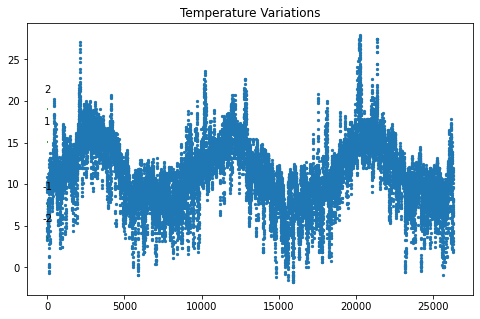

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.title("Temperature Variations") # Title
#plt.ylim(-40,40) # Setting y limits
plt.scatter(x=df.index, y=df['ker_temp'], s=5); # Plotting scatter


plt.hlines(y=df['ker_temp'].mean(), xmin=0, xmax=max(df["ker_temp"])) # Mean


for std_int in [-2, -1, 1, 2]: # Going through different stds from the mean
    standard_deviation = df['ker_temp'].mean() + df['ker_temp'].std()*std_int
    
    plt.hlines(y=standard_deviation,
               xmin=0,
               xmax=max(df["ker_temp"]),
               linestyles='dashed',
               colors='green'); # 1 std above
    
    # Giving labels to the lines we just drew
    plt.text(y=standard_deviation + 2, x=-10, s=std_int, ha='center')

In [5]:
df  = weatherMerged

In [6]:
df.loc[df['tip_temp']==' ']= np.nan 

In [7]:
df = weatherMerged
data_1 = df['dub_temp']
data_2 = df['cor_temp']
data_3 = df['ker_temp']
data_4 = df['tip_temp']
data_5 = df['may_temp']
data_6 = df['sli_temp']
data_7 = df['don_temp']
data = [data_1, data_2, data_3, data_4,data_5,data_6,data_7]

In [8]:
try:
    data_4.astype('float')
    print("All Good")
except ValueError:
        print("Something wrong with the types!")
#return("Something wrong with the types")

All Good


In [9]:
for i in range(len(data_4)):
    try:
        s = np.array(data_4[i],dtype = np.float)
    except ValueError:
        print("The value is",data_4[i],". The number is",i )
        print()

In [10]:
df = df.drop(['tip_temp'], axis = 1)
data_4 = weatherMerged['tip_temp']
data_4_i = []
def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_4:
    j=conv(i)
    data_4_i.append(j)
#xtra = {'tip_temp': data_4_i}
#df = df.append(pd.DataFrame(xtra))

df['tip_temp']= np.array(data_4_i, dtype=np.float) 

In [11]:
data_4 = df['tip_temp']
print(len(data_4))
print(len(data_4_i))
print(type(data_4_i[0]))
print(type(data_4[0]))

26283
26283
<class 'float'>
<class 'numpy.float64'>


In [12]:
# Checking the types
print(type(data_1[0]))
print(type(data_2[0]))
print(type(data_3[0]))
print(type(data_4[0]))
print(type(data_5[0]))
print(type(data_6[0]))
print(type(data_7[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [13]:
import numpy as np 
df=df.replace('', np.nan, regex=True)
df = df.dropna()

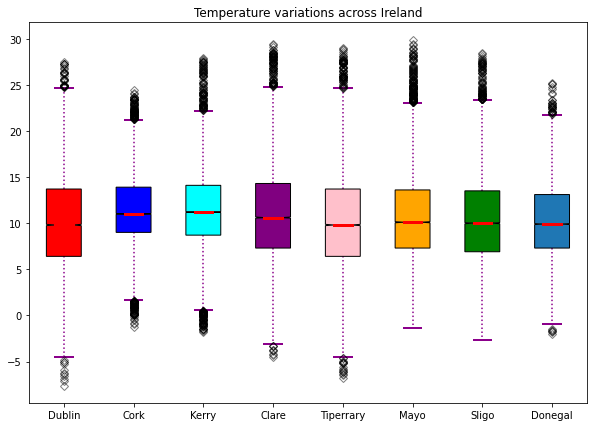

In [14]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)
data_1 = df['dub_temp']
data_2 = df['cor_temp']
data_3 = df['ker_temp']
data_4 = df['cla_temp']
data_5 = df['tip_temp']
data_6 = df['may_temp']
data_7 = df['sli_temp']
data_8 = df['don_temp']
data = [data_1, data_2, data_3, data_4,data_5,data_6,data_7,data_8]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 1)
 
colors = ['red','blue','cyan','purple','pink','orange','green']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_xticklabels(['Dublin', 'Cork',
                    'Kerry', 'Clare',
                    'Tiperrary', 'Mayo',
                    'Sligo','Donegal'])

 
# Adding title
plt.title("Temperature variations across Ireland")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

In [15]:
df = weatherMerged

In [16]:

data_1 = df['dub_wdsp']
data_2 = df['cor_wdsp']
data_3 = df['ker_wdsp']
data_4 = df['cla_wdsp']
data_5 = df['tip_wdsp']
data_6 = df['may_wdsp']
data_7 = df['sli_wdsp']
data_8 = df['don_wdsp']

In [17]:
# Checking the types
print(type(data_1[0]))
print(type(data_2[0]))
print(type(data_3[0]))
print(type(data_4[0]))
print(type(data_5[0]))
print(type(data_6[0]))
print(type(data_7[0]))
print(type(data_8[0]))

<class 'int'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [18]:
for i in range(len(data_1)):
    try:
        s = np.array(data_1[i],dtype = np.float)
    except ValueError:
        print("The value is",data_1[i],". The number is",i )
        print()
        
df.loc[df['dub_wdsp']==' ']= np.nan 

The value is   . The number is 10018

The value is   . The number is 10019

The value is   . The number is 10020

The value is   . The number is 10021



In [19]:

df.loc[df['tip_wdsp']=='   ']= np.nan
df.loc[df['tip_wdsp']=='  ']= np.nan 
df.loc[df['tip_wdsp']==' ']= np.nan 
df.loc[df['tip_wdsp']=='']= np.nan 

for i in range(len(data_5)):
    try:
        s = np.array(data_5[i],dtype = np.float)
    except ValueError:
        print("The value is",data_5[i],". The number is",i )
        print()
        
df.loc[df['tip_wdsp']==' ']= np.nan 

In [20]:
df = df.drop(['dub_wdsp'], axis = 1)
data_1 = weatherMerged['dub_wdsp']
data_1_i = []
def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_1:
    j=conv(i)
    data_1_i.append(j)
#xtra = {'tip_temp': data_4_i}
#df = df.append(pd.DataFrame(xtra))

df['dub_wdsp']= np.array(data_1_i, dtype=np.float) 

In [21]:
df = df.drop(['tip_wdsp'], axis = 1)
data_5 = weatherMerged['tip_wdsp']
data_5_i = []
def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_5:
    j=conv(i)
    data_5_i.append(j)
#xtra = {'tip_temp': data_4_i}
#df = df.append(pd.DataFrame(xtra))

df['tip_wdsp']= np.array(data_5_i, dtype=np.float) 

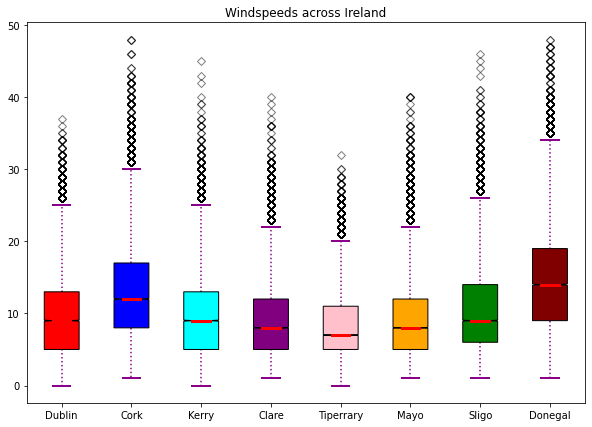

In [22]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)
data_1 = df['dub_wdsp']
data_2 = df['cor_wdsp']
data_3 = df['ker_wdsp']
data_4 = df['cla_wdsp']
data_5 = df['tip_wdsp']
data_6 = df['may_wdsp']
data_7 = df['sli_wdsp']
data_8 = df['don_wdsp']

data1 = data_1.to_numpy()
data2 = data_2.to_numpy()
data3 = data_3.to_numpy()
data4 = data_4.to_numpy()
data5 = data_5.to_numpy()
data6 = data_6.to_numpy()
data7 = data_7.to_numpy()
data8 = data_8.to_numpy()


data1 = data1[~np.isnan(data1)] 
data2 = data2[~np.isnan(data2)] 
data3 = data3[~np.isnan(data3)] 
data4 = data4[~np.isnan(data4)] 
data5 = data5[~np.isnan(data5)] 
data6 = data6[~np.isnan(data6)] 
data7 = data7[~np.isnan(data7)] 
data8 = data8[~np.isnan(data8)] 

data = [data1, data2, data3, data4,data5,data6,data7,data8]


#data = [data_1, data_2, data_3, data_4,data_5,data_6,data_7,data_8]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 1)
 
colors = ['red','blue','cyan','purple','pink','orange','green','maroon']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_xticklabels(['Dublin', 'Cork',
                    'Kerry', 'Clare',
                    'Tiperrary', 'Mayo',
                    'Sligo','Donegal'])

 
# Adding title
plt.title("Windspeeds across Ireland")
 
# Removing top axes and right axes

# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

In [23]:
df = weatherMerged

In [24]:
data_1 = df['dub_wddir']
data_2 = df['cor_wddir']
data_3 = df['ker_wddir']
data_4 = df['cla_wddir']
data_5 = df['tip_wddir']
data_6 = df['may_wddir']
data_7 = df['sli_wddir']
data_8 = df['don_wddir']
data = [data_1, data_2, data_3, data_4,data_5,data_6,data_7,data_8]

print(type(data_1[0]))
print(type(data_2[0]))
print(type(data_3[0]))
print(type(data_4[0]))
print(type(data_5[0]))
print(type(data_6[0]))
print(type(data_7[0]))
print(type(data_8[0]))

<class 'int'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'int'>


In [25]:
for i in range(len(data_1)):
    try:
        s = np.array(data_1[i],dtype = np.float)
    except ValueError:
        print("The value is",data_1[i],". The number is",i )
        print()
    except KeyError: 
        print("The value is",data_1[i],". The number is",i )
        print()

for i in range(len(data_1)):
    try:
        s = np.array(data_1[i],dtype = np.float)
    except ValueError:
        print("The value is",data_1[i],". The number is",i )
        print()
        
df.loc[df['dub_wddir']==' ']= np.nan 

df = df.drop(['dub_wddir'], axis = 1)
data_1 = weatherMerged['dub_wddir']
data_1_i = []


def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_1:
    j=conv(i)
    data_1_i.append(j)
#xtra = {'tip_temp': data_4_i}
#df = df.append(pd.DataFrame(xtra))

df['dub_wddir']= np.array(data_1_i, dtype=np.float) 

In [26]:
for i in range(len(data_5)):
    try:
        s = np.array(data_5[i],dtype = np.float)
    except ValueError:
        print("The value is",data_5[i],". The number is",i )
        print()
    except KeyError: 
        print("The value is",data_5[i],". The number is",i )
        print()

for i in range(len(data_5)):
    try:
        s = np.array(data_5[i],dtype = np.float)
    except ValueError:
        print("The value is",data_5[i],". The number is",i )
        print()

df.loc[df['tip_wddir']=='   ']= np.nan
df.loc[df['tip_wddir']=='  ']= np.nan 
df.loc[df['tip_wddir']==' ']= np.nan 
df.loc[df['tip_wddir']=='']= np.nan 
df = df.drop(['tip_wddir'], axis = 1)
data_5 = weatherMerged['tip_wddir']
data_5_i = []


def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_5:
    j=conv(i)
    data_5_i.append(j)
#xtra = {'tip_temp': data_4_i}
#df = df.append(pd.DataFrame(xtra))

df['tip_wddir']= np.array(data_5_i, dtype=np.float) 

In [27]:
for i in range(len(data_8)):
    try:
        s = np.array(data_8[i],dtype = np.float)
    except ValueError:
        print("The value is",data_8[i],". The number is",i )
        print()
    except KeyError: 
        print("The value is",data_8[i],". The number is",i )
        print()

for i in range(len(data_8)):
    try:
        s = np.array(data_8[i],dtype = np.float)
    except ValueError:
        print("The value is",data_8[i],". The number is",i )
        print()

df.loc[df['don_wddir']=='   ']= np.nan
df.loc[df['don_wddir']=='  ']= np.nan 
df.loc[df['don_wddir']==' ']= np.nan 
df.loc[df['don_wddir']=='']= np.nan 
df = df.drop(['don_wddir'], axis = 1)
data_8 = weatherMerged['don_wddir']
data_8_i = []


def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_5:
    j=conv(i)
    data_8_i.append(j)
#xtra = {'tip_temp': data_4_i}
#df = df.append(pd.DataFrame(xtra))

df['don_wddir']= np.array(data_8_i, dtype=np.float) 

The value is   . The number is 14711

The value is   . The number is 18738

The value is   . The number is 14711

The value is   . The number is 18738



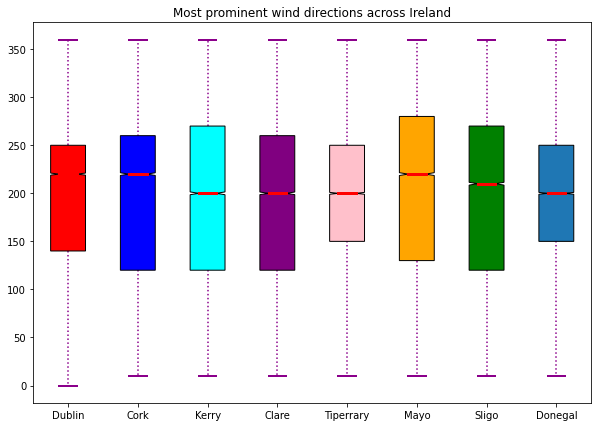

In [28]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)
data_1 = df['dub_wddir']
data_2 = df['cor_wddir']
data_3 = df['ker_wddir']
data_4 = df['cla_wddir']
data_5 = df['tip_wddir']
data_6 = df['may_wddir']
data_7 = df['sli_wddir']
data_8 = df['don_wddir']

data1 = data_1.to_numpy()
data2 = data_2.to_numpy()
data3 = data_3.to_numpy()
data4 = data_4.to_numpy()
data5 = data_5.to_numpy()
data6 = data_6.to_numpy()
data7 = data_7.to_numpy()
data8 = data_8.to_numpy()


data1 = data1[~np.isnan(data1)] 
data2 = data2[~np.isnan(data2)] 
data3 = data3[~np.isnan(data3)] 
data4 = data4[~np.isnan(data4)] 
data5 = data5[~np.isnan(data5)] 
data6 = data6[~np.isnan(data6)] 
data7 = data7[~np.isnan(data7)] 
data8 = data8[~np.isnan(data8)] 

data = [data1, data2, data3, data4,data5,data6,data7,data8]

#data = [data_1, data_2, data_3, data_4,data_5,data_6,data_7,data_8]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 1)
 
colors = ['red','blue','cyan','purple','pink','orange','green']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_xticklabels(['Dublin', 'Cork',
                    'Kerry', 'Clare',
                    'Tiperrary', 'Mayo',
                    'Sligo','Donegal'])

 
# Adding title
plt.title("Most prominent wind directions across Ireland")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

### Wind Energy Dataset <a name="windEnergy"></a>

#### Total Wind Energy Produced


In [29]:
import pandas as pd
import datetime as td
weatherMerged = pd.read_csv('data/weatherMerged.csv')
df = weatherMerged

C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,39,41,111,123,131,133,135,136,137,138,139,141,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:

data_1 = df['ActualGenerationMW']
data_2 = df['ForecastWind']
data_3 = df['ActualWind']
data_4 = df['ActualDemand']
#data_4 = df['ForecastDemand']

print(type(data_1[0]))
print(type(data_2[0]))
print(type(data_3[0]))
print(type(data_4[0]))
#print(type(data_5[0]))

data = [data_1,data_2,data_3,data_4]

<class 'numpy.float64'>
<class 'int'>
<class 'str'>
<class 'str'>


In [31]:
'''for i in range(len(data_2)):
    try:
        s = np.array(data_2[i],dtype = np.float)
    except ValueError:
        print("The value is",data_2[i],". The number is",i )
        print()
    except KeyError: 
        print("The value is",data_2[i],". The number is",i )
        print()

for i in range(len(data_2)):
    try:
        s = np.array(data_2[i],dtype = np.float)
    except ValueError:
        print("The value is",data_2[i],". The number is",i )
        print()
  '''      
df.loc[df['ForecastWind']=='   ']= np.nan
df.loc[df['ForecastWind']=='  ']= np.nan 
df.loc[df['ForecastWind']==' ']= np.nan 
df.loc[df['ForecastWind']=='- ']= np.nan
df.loc[df['ForecastWind']=='-']= np.nan
df.loc[df['ForecastWind']==' - ']= np.nan
df.loc[df['ForecastWind']==' -']= np.nan 
df.loc[df['ForecastWind']=='']= np.nan 

df.loc[df['ActualWind']=='   ']= np.nan
df.loc[df['ActualWind']=='  ']= np.nan 
df.loc[df['ActualWind']==' ']= np.nan 
df.loc[df['ActualWind']=='- ']= np.nan
df.loc[df['ActualWind']=='-']= np.nan 
df.loc[df['ActualWind']==' -']= np.nan 
df.loc[df['ActualWind']=='']= np.nan 

df = df.drop(['ActualWind'], axis = 1)
data_3 = weatherMerged['ActualWind']
data_3_i = []
df = df.drop(['ForecastWind'], axis = 1)
data_2 = weatherMerged['ForecastWind']
data_2_i = []


def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_2:
    j=conv(i)
    data_2_i.append(j)

def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_3:
    j=conv(i)
    data_3_i.append(j)
    
#print(data_2_i)
df['ForecastWind']= np.array(data_2_i, dtype=np.float) 
df['ActualWind']= np.array(data_3_i, dtype=np.float) 

In [32]:
'''for i in range(len(data_5)):
    try:
        s = np.array(data_5[i],dtype = np.float)
    except ValueError:
        print("The value is",data_5[i],". The number is",i )
        print()
    except KeyError: 
        print("The value is",data_5[i],". The number is",i )
        print()

for i in range(len(data_5)):
    try:
        s = np.array(data_5[i],dtype = np.float)
    except ValueError:
        print("The value is",data_5[i],". The number is",i )
        print()
'''
df.loc[df['ActualDemand']=='   ']= np.nan
df.loc[df['ActualDemand']=='  ']= np.nan 
df.loc[df['ActualDemand']==' ']= np.nan 
df.loc[df['ActualDemand']=='- ']= np.nan
df.loc[df['ActualDemand']=='-']= np.nan 
df.loc[df['ActualDemand']=='']= np.nan 
df = df.drop(['ActualDemand'], axis = 1)
data_4 = weatherMerged['ActualDemand']
data_4_i = []


def conv(s):
    try:
        s=float(s)
    except ValueError:
        pass    
    return s
for i in data_4:
    j=conv(i)
    data_4_i.append(j)

df['ActualDemand']= np.array(data_4_i, dtype=np.float) 

In [33]:
df = df.dropna(subset = ['ActualGenerationMW','ForecastWind','ActualWind','ActualDemand'])

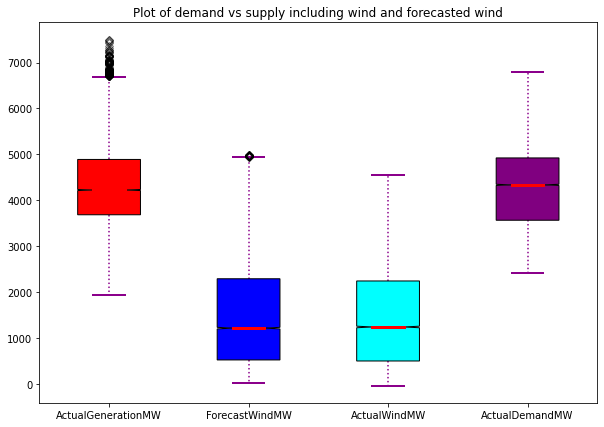

In [34]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)
data_1 = df['ActualGenerationMW']
data_2 = df['ForecastWind']
data_3 = df['ActualWind']
data_4 = df['ActualDemand']

data1 = data_1.to_numpy()
data2 = data_2.to_numpy()
data3 = data_3.to_numpy()
data4 = data_4.to_numpy()

data1 = data1[~np.isnan(data1)] 
data2 = data2[~np.isnan(data2)] 
data3 = data3[~np.isnan(data3)] 
data4 = data4[~np.isnan(data4)] 
data = [data1, data2, data3, data4]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')
 
colors = ['red','blue','cyan','purple','pink']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_xticklabels(['ActualGenerationMW', 'ForecastWindMW',
                    'ActualWindMW','ActualDemandMW'])

# Adding title
plt.title("Plot of demand vs supply including wind and forecasted wind")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

### Making a Collinearity matrix

In [35]:
## Creating a subset dataframe
df['date2'] =  pd.to_datetime(df['date2'])
df1 = df[['date2',"ActualGenerationMW","ForecastWind","ActualWind","ActualDemand",'ker_temp','dub_temp','dub_wddir','don_wddir','dub_wdsp','may_wdsp','dub_msl']]
df1['hour']=df1['date2'].dt.hour
df1['dayOfWeek']=df1['date2'].dt.day_of_week
df1['dayOfYear']=df1['date2'].dt.day_of_year
df1=df1.dropna()

C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Many of the columns can be linearly independent, and we now search for eigenvectors in the dataframe.

In [36]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,ActualGenerationMW,ForecastWind,ActualWind,ActualDemand,ker_temp,dub_temp,may_wdsp,dub_msl,hour,dayOfWeek,dayOfYear
ActualGenerationMW,1.000000,0.527617,0.602157,0.794248,-0.142313,-0.141480,0.427189,-0.155138,0.421890,-0.142132,-0.045806
ForecastWind,0.527617,1.000000,0.952190,0.128436,-0.127587,-0.148182,0.774512,-0.395655,0.010801,0.026544,-0.074758
ActualWind,0.602157,0.952190,1.000000,0.197361,-0.119348,-0.141738,0.742147,-0.361561,0.061841,-0.001116,-0.072120
ActualDemand,0.794248,0.128436,0.197361,1.000000,-0.105973,-0.071840,0.127761,-0.042265,0.600757,-0.176187,-0.046366
ker_temp,-0.142313,-0.127587,-0.119348,-0.105973,1.000000,0.882282,0.009727,0.070047,0.113146,0.002899,0.260282
dub_temp,-0.141480,-0.148182,-0.141738,-0.071840,0.882282,1.000000,-0.000880,0.039449,0.151678,-0.010632,0.201117
may_wdsp,0.427189,0.774512,0.742147,0.127761,0.009727,-0.000880,1.000000,-0.301662,0.068966,0.014051,-0.090373
dub_msl,-0.155138,-0.395655,-0.361561,-0.042265,0.070047,0.039449,-0.301662,1.000000,0.002380,-0.039172,-0.181844
hour,0.421890,0.010801,0.061841,0.600757,0.113146,0.151678,0.068966,0.002380,1.000000,-0.000192,-0.000396
dayOfWeek,-0.142132,0.026544,-0.001116,-0.176187,0.002899,-0.010632,0.014051,-0.039172,-0.000192,1.000000,-0.003315


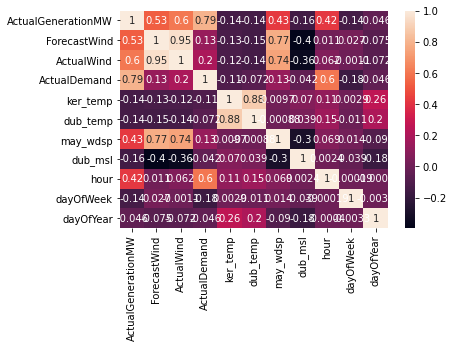

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
hm = sns.heatmap(df1.corr(), annot = True)
#hm.set(xlabel='\nIRIS Flower Details', ylabel='IRIS Flower Details\t', title = "Correlation matrix of IRIS data\n")
corr.style.background_gradient(cmap='coolwarm')
plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
add_constant(df)

C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Date&Time,ActualGenerationMW,ForecastDemand,date2,minute,ker_ind,ker_rain,ker_ind.1,ker_temp,ker_ind.2,...,tip_vappr,tip_rhum,tip_msl,tip_ind.3,tip_wdsp,tip_ind.4,tip_wddir,ForecastWind,ActualWind,ActualDemand
0,1 April 2019 00:00,2681.0,-,2019-04-01 00:00:00,0.0,0.0,0.0,0.0,6.3,0.0,...,7.7,88,1024.0,2.0,3,2.0,130,273.0,555.0,3430.0
1,1 April 2019 01:00,2696.0,-,2019-04-01 01:00:00,0.0,0.0,0.0,0.0,4.6,0.0,...,6.6,89,1023.8,2.0,2,2.0,140,241.0,470.0,3281.0
2,1 April 2019 02:00,2834.0,-,2019-04-01 02:00:00,0.0,0.0,0.0,0.0,4.8,0.0,...,6.7,92,1023.2,2.0,3,2.0,160,222.0,372.0,3149.0
3,1 April 2019 03:00,2886.0,-,2019-04-01 03:00:00,0.0,0.0,0.0,0.0,3.7,0.0,...,6.5,92,1022.4,2.0,3,2.0,150,225.0,342.0,3073.0
4,1 April 2019 04:00,2891.0,-,2019-04-01 04:00:00,0.0,0.0,0.0,0.0,3.3,0.0,...,7.5,95,1021.6,2.0,3,2.0,180,253.0,342.0,3024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,31 March 2022 19:00,5542.0,-,2022-03-31 19:00:00,0.0,0.0,0.0,0.0,6.8,0.0,...,5.4,62,1022.2,2.0,7,2.0,350,1949.0,1891.0,5291.0
26279,31 March 2022 20:00,5506.0,-,2022-03-31 20:00:00,0.0,0.0,0.0,0.0,6.6,0.0,...,5.4,65,1022.8,2.0,8,2.0,340,1781.0,1434.0,5254.0
26280,31 March 2022 21:00,5514.0,-,2022-03-31 21:00:00,0.0,0.0,0.0,0.0,6.6,0.0,...,5.4,72,1023.3,2.0,8,2.0,330,1716.0,1379.0,5369.0
26281,31 March 2022 22:00,5042.0,-,2022-03-31 22:00:00,0.0,0.0,0.0,0.0,6.3,0.0,...,5.4,79,1023.6,2.0,7,2.0,320,1635.0,1422.0,4907.0


In [39]:
#df1 = df1[["ActualGenerationMW","ForecastWind","ActualWind","ActualDemand",'ker_temp','dub_temp','dub_wddir','don_wddir','dub_wdsp','may_wdsp','dub_msl']]

In [40]:
from platform import python_version

print(python_version())

3.8.0


In [41]:
'''## Could be an idea to get the code 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

num_df = add_constant(df)

vif = [variance_inflation_factor(num_df, i) for i in range(num_df.to_numpy().shape[0])]

pd.DataFrame(num_df.iloc[:, 1:].columns, vif[1:])
'''

'## Could be an idea to get the code \nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nfrom statsmodels.api import add_constant\n\nnum_df = add_constant(df)\n\nvif = [variance_inflation_factor(num_df, i) for i in range(num_df.to_numpy().shape[0])]\n\npd.DataFrame(num_df.iloc[:, 1:].columns, vif[1:])\n'

### Creating Fourier Transforms of the data

In [42]:
(df1['hour']/24)

0        0.000000
1        0.041667
2        0.083333
3        0.125000
4        0.166667
           ...   
26278    0.791667
26279    0.833333
26280    0.875000
26281    0.916667
26282    0.958333
Name: hour, Length: 26249, dtype: float64

In [43]:
df1

,date2,ActualGenerationMW,ForecastWind,ActualWind,ActualDemand,ker_temp,dub_temp,dub_wddir,don_wddir,dub_wdsp,may_wdsp,dub_msl,hour,dayOfWeek,dayOfYear
0,2019-04-01 00:00:00,2681.0,273.0,555.0,3430.0,6.3,8.4,90,150,4,5.0,1023.9,0,0,91
1,2019-04-01 01:00:00,2696.0,241.0,470.0,3281.0,4.6,8.5,110,150,4,6.0,1023.5,1,0,91
2,2019-04-01 02:00:00,2834.0,222.0,372.0,3149.0,4.8,8.7,130,140,3,6.0,1023.1,2,0,91
3,2019-04-01 03:00:00,2886.0,225.0,342.0,3073.0,3.7,8.3,190,140,4,6.0,1022.6,3,0,91
4,2019-04-01 04:00:00,2891.0,253.0,342.0,3024.0,3.3,7.7,320,150,2,4.0,1022.0,4,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,2022-03-31 19:00:00,5542.0,1949.0,1891.0,5291.0,6.8,5.9,330,360,6,7.0,1020.8,19,3,90
26279,2022-03-31 20:00:00,5506.0,1781.0,1434.0,5254.0,6.6,4.0,320,360,5,4.0,1021.5,20,3,90
26280,2022-03-31 21:00:00,5514.0,1716.0,1379.0,5369.0,6.6,3.2,320,360,5,4.0,1022.0,21,3,90
26281,2022-03-31 22:00:00,5042.0,1635.0,1422.0,4907.0,6.3,3.0,330,10,5,3.0,1022.3,22,3,90


In [44]:
sum_col = df1['dayOfYear'][0]+(df1['hour']/24)

In [45]:
'''import numpy as np

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(y))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)
'''

'import numpy as np\n\n# apply fast fourier transform and take absolute values\nf=abs(np.fft.fft(y))\n\n# get the list of frequencies\nnum=np.size(x)\nfreq = [i / num for i in list(range(num))]\n\n# get the list of spectrums\nspectrum=f.real*f.real+f.imag*f.imag\nnspectrum=spectrum/spectrum[0]\n\n# plot nspectrum per frequency, with a semilog scale on nspectrum\nplt.semilogy(freq,nspectrum)\n'

([<matplotlib.axis.XTick at 0x29bb999dfd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

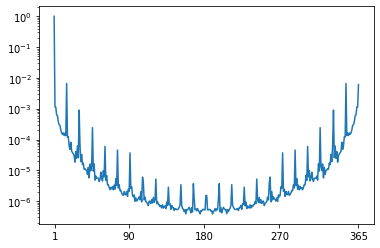

In [46]:
x = list(range(len(df1.index)))

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(df1['ActualGenerationMW']))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
#plt.semilogy(freq,nspectrum)
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/365)
#plt.semilogy(results['period'], results['nspectrum'])
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 90, 180, 270, 365])

([<matplotlib.axis.XTick at 0x29bb9c84370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

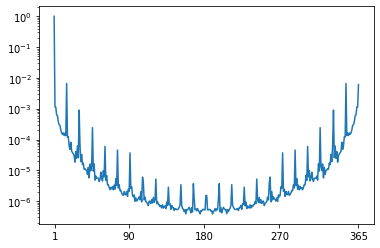

In [47]:
x = list(range(len(df1.index)))

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(df1['ActualGenerationMW']))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
#plt.semilogy(freq,nspectrum)
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/365)
#plt.semilogy(results['period'], results['nspectrum'])
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 90, 180, 270, 365])

([<matplotlib.axis.XTick at 0x29bb9ac5a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

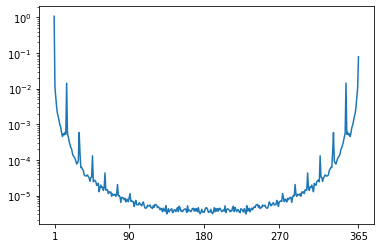

In [48]:
x = list(range(len(df1.index)))

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(df1['dub_temp']))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
#plt.semilogy(freq,nspectrum)
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/365)
#plt.semilogy(results['period'], results['nspectrum'])
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 90, 180, 270, 365])

([<matplotlib.axis.XTick at 0x29bb9d8dfd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

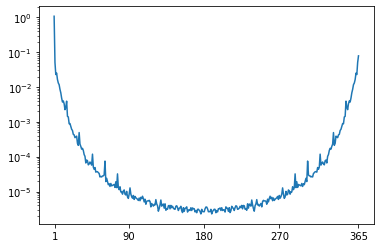

In [49]:
x = list(range(len(df1.index)))

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(df1['ActualWind']))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
#plt.semilogy(freq,nspectrum)
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/365)
#plt.semilogy(results['period'], results['nspectrum'])
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 90, 180, 270, 365])

### Constructing a vector from the periodic time-series data

In [50]:
import math as ma

In [51]:
df1.columns

Index(['date2', 'ActualGenerationMW', 'ForecastWind', 'ActualWind',
       'ActualDemand', 'ker_temp', 'dub_temp', 'dub_wddir', 'don_wddir',
       'dub_wdsp', 'may_wdsp', 'dub_msl', 'hour', 'dayOfWeek', 'dayOfYear'],
      dtype='object')

In [52]:
ma.sin(1)

0.8414709848078965

In [53]:
np.sin(df1["dayOfYear"]/365)

0        0.246740
1        0.246740
2        0.246740
3        0.246740
4        0.246740
           ...   
26278    0.244084
26279    0.244084
26280    0.244084
26281    0.244084
26282    0.244084
Name: dayOfYear, Length: 26249, dtype: float64

In [54]:
df1["sin_hour"]=np.sin(df1["hour"]/24*2*ma.pi)
df1["sin_day"]=np.sin(df1["dayOfYear"]/365*(2*ma.pi))


df1["cos_hour"]=np.sin(df1["hour"]/24*2*ma.pi)
df1["cos_day"]=np.sin(df1["dayOfYear"]/365*(2*ma.pi))


In [55]:
df1

,date2,ActualGenerationMW,ForecastWind,ActualWind,ActualDemand,ker_temp,dub_temp,dub_wddir,don_wddir,dub_wdsp,may_wdsp,dub_msl,hour,dayOfWeek,dayOfYear,sin_hour,sin_day,cos_hour,cos_day
0,2019-04-01 00:00:00,2681.0,273.0,555.0,3430.0,6.3,8.4,90,150,4,5.0,1023.9,0,0,91,0.000000,0.999991,0.000000,0.999991
1,2019-04-01 01:00:00,2696.0,241.0,470.0,3281.0,4.6,8.5,110,150,4,6.0,1023.5,1,0,91,0.258819,0.999991,0.258819,0.999991
2,2019-04-01 02:00:00,2834.0,222.0,372.0,3149.0,4.8,8.7,130,140,3,6.0,1023.1,2,0,91,0.500000,0.999991,0.500000,0.999991
3,2019-04-01 03:00:00,2886.0,225.0,342.0,3073.0,3.7,8.3,190,140,4,6.0,1022.6,3,0,91,0.707107,0.999991,0.707107,0.999991
4,2019-04-01 04:00:00,2891.0,253.0,342.0,3024.0,3.3,7.7,320,150,2,4.0,1022.0,4,0,91,0.866025,0.999991,0.866025,0.999991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,2022-03-31 19:00:00,5542.0,1949.0,1891.0,5291.0,6.8,5.9,330,360,6,7.0,1020.8,19,3,90,-0.965926,0.999769,-0.965926,0.999769
26279,2022-03-31 20:00:00,5506.0,1781.0,1434.0,5254.0,6.6,4.0,320,360,5,4.0,1021.5,20,3,90,-0.866025,0.999769,-0.866025,0.999769
26280,2022-03-31 21:00:00,5514.0,1716.0,1379.0,5369.0,6.6,3.2,320,360,5,4.0,1022.0,21,3,90,-0.707107,0.999769,-0.707107,0.999769
26281,2022-03-31 22:00:00,5042.0,1635.0,1422.0,4907.0,6.3,3.0,330,10,5,3.0,1022.3,22,3,90,-0.500000,0.999769,-0.500000,0.999769


Above we see that the wind direction is shown in degrees. This is not an ideal format for the direction to be entered as a variable for numerical modelling as 360° and 0° are equal, and so the model should warp around.

Secondly, wind direction is found to have a negatory effect if windspeed is high, (See there opposite assication with generation shown in the diagram above). Therefore creating a wind vector which is a combination of the two would be optimal

Below taken from:- 
TY  - JOUR
AU  - Sánchez Pérez, Pedro Andrés
AU  - Robles, Miguel
AU  - Jaramillo, O.A.
PY  - 2015/10/27
SP  - 
T1  - Real time Markov chains: Wind states in anemometric data
VL  - 8
DO  - 10.1063/1.4943120
JO  - Journal of Renewable and Sustainable Energy
ER  - 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
'''
# Generate fake data
x =df1["cos_wind"]=df1["cos_wind"]*np.sin(df1["dub_wddir"])
y = df1["sin_wind"]*np.cos(df1["sin_wind_wddir"])

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
ax.set_facecolor('black')
plt.show()'''

'\n# Generate fake data\nx =df1["cos_wind"]=df1["cos_wind"]*np.sin(df1["dub_wddir"])\ny = df1["sin_wind"]*np.cos(df1["sin_wind_wddir"])\n\n# Calculate the point density\nxy = np.vstack([x,y])\nz = gaussian_kde(xy)(xy)\n\nfig, ax = plt.subplots()\nax.scatter(x, y, c=z, s=100)\nax.set_facecolor(\'black\')\nplt.show()'

In [57]:
rng = np.random.RandomState(304)
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)

In [58]:
'''import collections
from collections import Counter
elements_count = collections.Counter(X_train)
elements_count=sorted(elements_count.items())
elements_count

elements_test = collections.Counter(X_test)
elements_test=sorted(elements_count.items())
elements_test
X_trans_qt = qt.fit(X_train).transform(X_test)'''

'import collections\nfrom collections import Counter\nelements_count = collections.Counter(X_train)\nelements_count=sorted(elements_count.items())\nelements_count\n\nelements_test = collections.Counter(X_test)\nelements_test=sorted(elements_count.items())\nelements_test\nX_trans_qt = qt.fit(X_train).transform(X_test)'

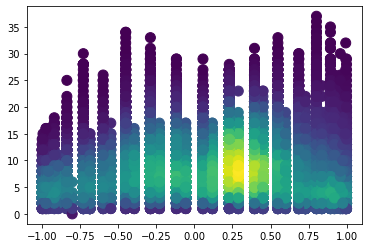

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
df1=df1._convert(numeric=True)
df1 = df1[df1['dub_wdsp'].notna()]
df1 = df1[df1['dub_wddir'].notna()]

# Generate fake data
x = np.sin(180-df1["dub_wddir"]/360*2*ma.pi)
y = df1["dub_wdsp"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

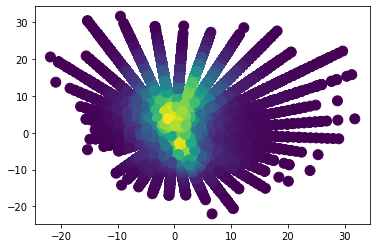

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
df1=df1._convert(numeric=True)
df1 = df1[df1['dub_wdsp'].notna()]
df1 = df1[df1['dub_wddir'].notna()]

# Generate fake data
x = df1["dub_wdsp"]*np.sin(180-df1["dub_wddir"]/360*2*ma.pi)
y = df1["dub_wdsp"]*np.cos(180-df1["dub_wddir"]/360*2*ma.pi)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

In [61]:
from numpy import linalg as LA

### Energy Prices Dataset <a name="ePrice"></a>

In [62]:
import pandas as pd
import numpy as np
import datetime as dt

In [63]:
ePrice = pd.read_csv('data/ePrice.csv')

In [64]:
ePrice.columns

Index(['StartTime', '\tEndTime', '\tNetImbalanceVolume',
       '\tImbalanceSettlementPrice'],
      dtype='object')

In [65]:
ePrice.columns= ['StartTime', 'EndTime', 'NetImbalanceVolume','ImbalanceSettlementPrice']

In [66]:
#weatherMerged['date2'] = [dt.datetime.strptime(d,"%Y-%m-%d %H:%M:%S") for d in weatherMerged["date2"] ]

In [67]:
'''ePrice['date2'] = [dt.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S") for d in ePrice["StartTime"] ]
ePrice['minute'] = ePrice['date2'].dt.minute
ePrice = ePrice[ePrice['minute'] == 0]
weatherPrice = pd.merge(ePrice,weatherMerged, on = 'date2')
'''

'ePrice[\'date2\'] = [dt.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S") for d in ePrice["StartTime"] ]\nePrice[\'minute\'] = ePrice[\'date2\'].dt.minute\nePrice = ePrice[ePrice[\'minute\'] == 0]\nweatherPrice = pd.merge(ePrice,weatherMerged, on = \'date2\')\n'

In [68]:
ePrice
# to be tested in the future to confirm our findings 

,StartTime,EndTime,NetImbalanceVolume,ImbalanceSettlementPrice
0,2022-05-27T00:00:00,\t2022-05-27T00:30:00,-29.291,74.45
1,2022-05-27T00:30:00,\t2022-05-27T01:00:00,-23.329,82.32
2,2022-05-27T01:00:00,\t2022-05-27T01:30:00,-36.292,52.02
3,2022-05-27T01:30:00,\t2022-05-27T02:00:00,-42.894,-107.00
4,2022-05-27T02:00:00,\t2022-05-27T02:30:00,-33.407,43.87
...,...,...,...,...
475,2022-06-05T21:30:00,\t2022-06-05T22:00:00,-2.506,130.87
476,2022-06-05T22:00:00,\t2022-06-05T22:30:00,4.662,135.90
477,2022-06-05T22:30:00,\t2022-06-05T23:00:00,24.937,189.09
478,2022-06-05T23:00:00,\t2022-06-05T23:30:00,24.452,185.32


In [69]:
ePrice['NetImbalanceVolume']

0     -29.291
1     -23.329
2     -36.292
3     -42.894
4     -33.407
        ...  
475    -2.506
476     4.662
477    24.937
478    24.452
479    18.246
Name: NetImbalanceVolume, Length: 480, dtype: float64

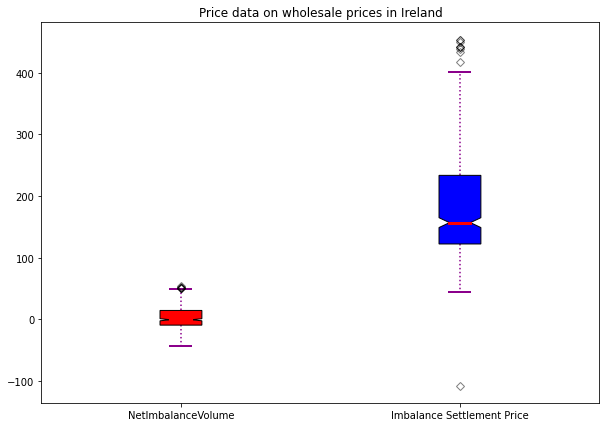

In [70]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)
data_1 = ePrice['NetImbalanceVolume']
data_2 = ePrice['ImbalanceSettlementPrice']
data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 1)
 
colors = ['red','blue']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_xticklabels(['NetImbalanceVolume', 'Imbalance Settlement Price'])

 
# Adding title
plt.title("Price data on wholesale prices in Ireland")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

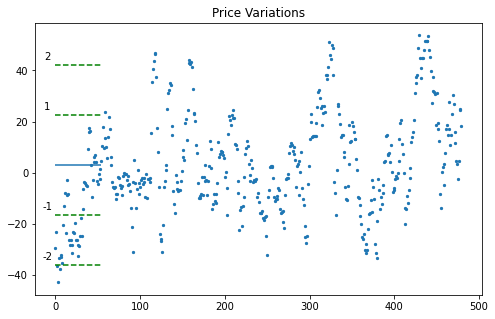

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.title("Price Variations") # Title
#plt.ylim(-40,40) # Setting y limits
plt.scatter(x=ePrice.index, y=ePrice['NetImbalanceVolume'], s=5); # Plotting scatter


plt.hlines(y=ePrice['NetImbalanceVolume'].mean(), xmin=0, xmax=max(ePrice['NetImbalanceVolume'])) # Mean


for std_int in [-2, -1, 1, 2]: # Going through different stds from the mean
    standard_deviation = ePrice['NetImbalanceVolume'].mean() + ePrice['NetImbalanceVolume'].std()*std_int
    
    plt.hlines(y=standard_deviation,
               xmin=0,
               xmax=max(ePrice['NetImbalanceVolume']),
               linestyles='dashed',
               colors='green'); # 1 std above
    
    # Giving labels to the lines we just drew
    plt.text(y=standard_deviation + 2, x=-10, s=std_int, ha='center')

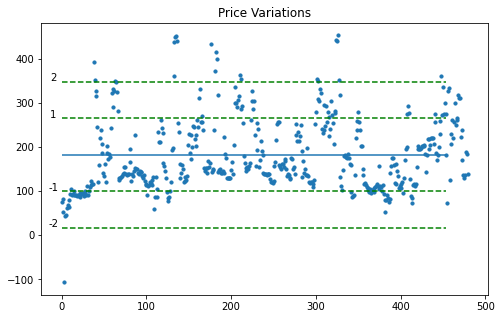

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.title("Price Variations") # Title
#plt.ylim(-40,40) # Setting y limits
plt.scatter(x=ePrice.index, y=ePrice['ImbalanceSettlementPrice'], s=10); # Plotting scatter


plt.hlines(y=ePrice['ImbalanceSettlementPrice'].mean(), xmin=0, xmax=max(ePrice['ImbalanceSettlementPrice'])) # Mean


for std_int in [-2, -1, 1, 2]: # Going through different stds from the mean
    standard_deviation = ePrice['ImbalanceSettlementPrice'].mean() + ePrice['ImbalanceSettlementPrice'].std()*std_int
    
    plt.hlines(y=standard_deviation,
               xmin=0,
               xmax=max(ePrice['ImbalanceSettlementPrice']),
               linestyles='dashed',
               colors='green'); # 1 std above
    
    # Giving labels to the lines we just drew
    plt.text(y=standard_deviation + 2, x=-10, s=std_int, ha='center')

### 